<a href="https://colab.research.google.com/github/HectorGtz27/FlameForeCastModel/blob/main/ModeloEntrenado2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

Paso 1.Preprocesamiento de Datos: Estandariza o normaliza las variables para que todas estén en la misma escala. Esto es especialmente importante para redes neuronales.

In [80]:
# Paso 1
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, LSTM, TimeDistributed
from tensorflow.keras.models import load_model

# Datos de muestra
data_with_coordinates = {
    'Lat': [34.0522, 34.0523, 34.0524, 34.0525, 34.0526],
    'Long': [-118.2437, -118.2438, -118.2439, -118.2440, -118.2441],
    'TMP': [25, 30, 27, 22, 29],
    'RH': [40, 35, 50, 60, 38],
    'WS': [10, 12, 8, 6, 11],
    'WD': [180, 200, 190, 170, 185],
    'FFMC': [85, 88, 80, 75, 87],
    'DMC': [30, 25, 40, 45, 28],
    'DC': [700, 690, 750, 770, 680],
    'ISI': [8, 9, 6, 5, 10],
    'BUI': [40, 35, 50, 55, 37],
    'FWI': [20, 22, 15, 10, 25]
}

df = pd.DataFrame(data_with_coordinates)

# Estandarizar las variables de entrada
scaler_X = StandardScaler()
X = df.drop('FWI', axis=1)
y = df['FWI']
scaler_X.fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X), columns=X.columns)




Paso 2.División del Conjunto de Datos: Divide los datos en conjuntos de entrenamiento, validación y prueba.

In [81]:
# Paso 2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Añadir una dimensión de etapa de tiempo
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1], 1))



Reshape para CNN y LSTM

Paso 3. Arquitectura de la Red: Define la arquitectura de tu red. Esto incluye elegir el número de capas ocultas y neuronas en cada capa. También debes decidir qué funciones de activación usar.

In [82]:
# Paso 3
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train.shape[2], 1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))



Paso 4. Eleccion del modelo

Las redes neuronales convolucionales (CNN) se utilizan comúnmente para el análisis de imágenes, pero también pueden aplicarse a datos secuenciales o geoespaciales. Podríamos diseñar una CNN para procesar nuestros datos, que incluyen tanto mediciones meteorológicas como coordenadas geográficas.

Incorporar unidades de memoria a largo plazo (Long Short-Term Memory, LSTM) es una excelente idea si estás trabajando con datos que tienen componentes secuenciales o temporales, como en el caso de datos meteorológicos y de incendios a lo largo del tiempo. Los LSTM son útiles para capturar patrones a largo plazo en series temporales, lo que podría ser fundamental para predecir la propagación de incendios forestales basándose en condiciones que han sido observadas en años anteriores.

Podríamos considerar una arquitectura híbrida que combine Convolutional Neural Networks (CNN) para capturar patrones espaciales y LSTM para patrones temporales.



In [83]:
# Paso 4
model.compile(optimizer='adam', loss='mean_squared_error')

 Paso 5. Evaluación del modelo.

 En esta fase, vamos a utilizar nuestro conjunto de datos de prueba para evaluar el rendimiento del modelo. Queremos asegurarnos de que nuestro modelo no solo se ajusta bien a los datos de entrenamiento, sino que también generaliza bien a nuevos datos.

In [84]:
# Paso 5
model.fit(X_train, y_train, epochs=10, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=1)
print("Pérdida del modelo en el conjunto de prueba: {}".format(loss))



Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 338.4676
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 336.9004
Epoch 3/10
1/1 [==============================] - 0s 28ms/step - loss: 335.4384
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 333.9622
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 332.4330
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 330.8268
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 329.0958
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 327.2047
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 325.0889
Epoch 10/10
1/1 [==============================] - 0s 279ms/step - loss: 458.3335
Pérdida del modelo en el conjunto de prueba: 458.3334655761719


Paso 6: Evaluación del Modelo

In [85]:
# Paso 6
# Evaluación del modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")


1/1 [==============================] - 0s 67ms/step - loss: 458.3335
Test Loss: 458.3334655761719


Paso 7: Interpretación de Resultados

In [86]:
# Paso 7
# Puedes acceder a los pesos así
for layer in model.layers:
    print(layer.get_weights())


[array([[[ 0.04474496, -0.20362131,  0.11905659,  0.22153796,
          0.27651072, -0.06092673,  0.19360355,  0.02067703,
          0.05364767,  0.02605966, -0.10088001, -0.24572499,
         -0.22265968, -0.18974712, -0.13819736, -0.07967658,
          0.26267022, -0.03067847,  0.10767719, -0.20770866,
          0.2514829 ,  0.2577087 , -0.08612059, -0.21254493,
         -0.1231638 , -0.05306346,  0.21390179, -0.3096558 ,
          0.19854982, -0.08634415,  0.29514113,  0.2900997 ,
          0.19576187,  0.18651551, -0.14541633, -0.23320319,
         -0.20935962, -0.11355431, -0.19566846,  0.03412516,
          0.21055074,  0.08261338, -0.07336874, -0.17386684,
         -0.21678525, -0.16060454, -0.04960968,  0.18960875,
         -0.16655287, -0.07139689, -0.21095842, -0.17214532,
         -0.08881526,  0.21067855,  0.0106893 , -0.06591243,
         -0.2986844 ,  0.20885019,  0.22816011, -0.04282924,
          0.10858764,  0.06266069,  0.06376967, -0.16780981]]],
      dtype=float32)

Paso 8: Puesta en Producción
Finalmente, una vez que estás satisfecho con tu modelo, puedes proceder a implementarlo en un entorno de producción. Esto podría implicar guardar el modelo entrenado y luego cargarlo en un servicio que pueda acceder a él para realizar predicciones en tiempo real.

In [87]:
# Paso 8
# Para guardar el modelo
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


SIMULACIONNNN







/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 0s 7ms/step


<ipython-input-88-327ceacd5d33>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df_simulated.pivot("Lat", "Long", "Predicted_FWI"), annot=True, fmt=".1f", cmap="YlGnBu")


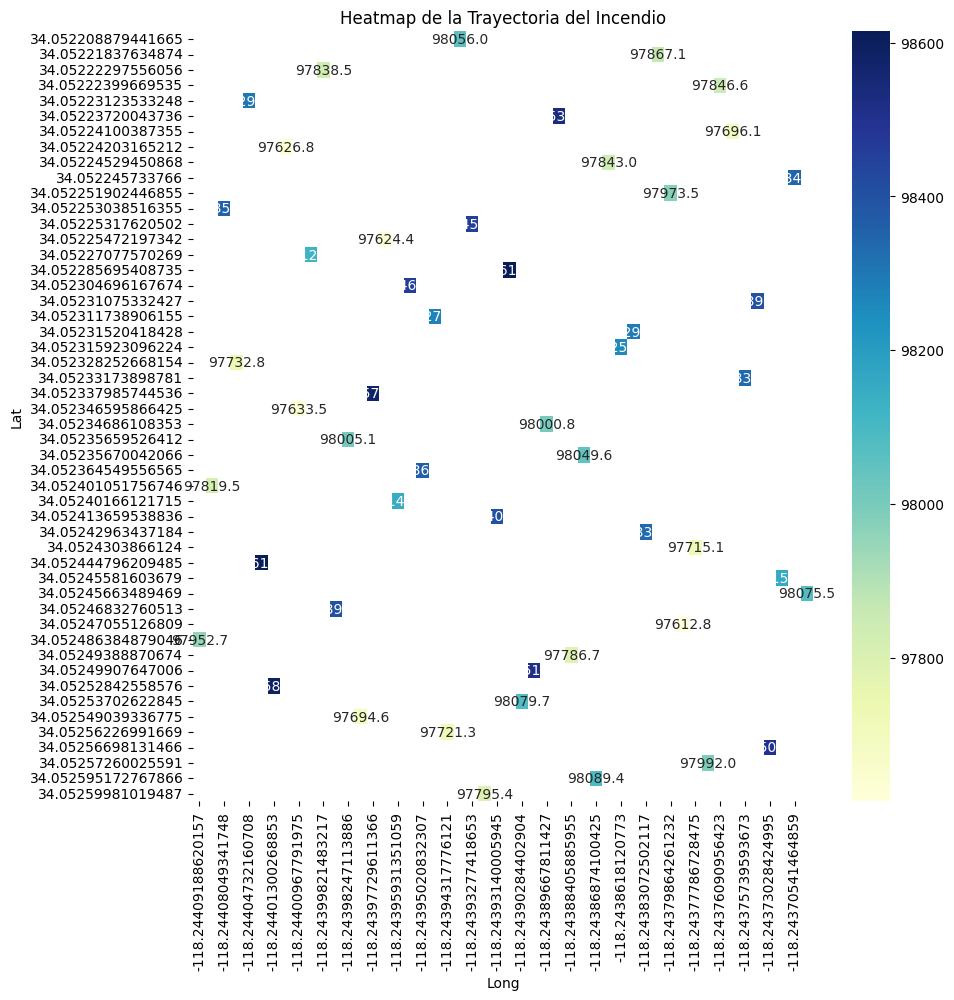

In [88]:
# Simulación
n_simulations = 50
random_data = np.random.rand(n_simulations, 11)  # 11 features
random_data = scaler_X.transform(random_data)
random_data = random_data.reshape((random_data.shape[0], 1, random_data.shape[1], 1))

predicted_FWI = model.predict(random_data)

df_simulated = pd.DataFrame({
    'Lat': np.random.uniform(low=min(df['Lat']), high=max(df['Lat']), size=n_simulations),
    'Long': np.random.uniform(low=min(df['Long']), high=max(df['Long']), size=n_simulations),
    'Predicted_FWI': predicted_FWI.flatten()
})

plt.figure(figsize=(10, 10))
sns.heatmap(df_simulated.pivot("Lat", "Long", "Predicted_FWI"), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap de la Trayectoria del Incendio')
plt.show()